In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:

# Load data
data = pd.read_csv('train.csv')
df = pd.DataFrame(data)


In [6]:
# Data cleaning
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()


In [7]:
# Basic analysis
print("Total Sales: $", df['Sales'].sum())
print("\nTop 5 Products by Sales:")
print(df.groupby('Product Name')['Sales'].sum().nlargest(5))


Total Sales: $ 2261536.7827000003

Top 5 Products by Sales:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


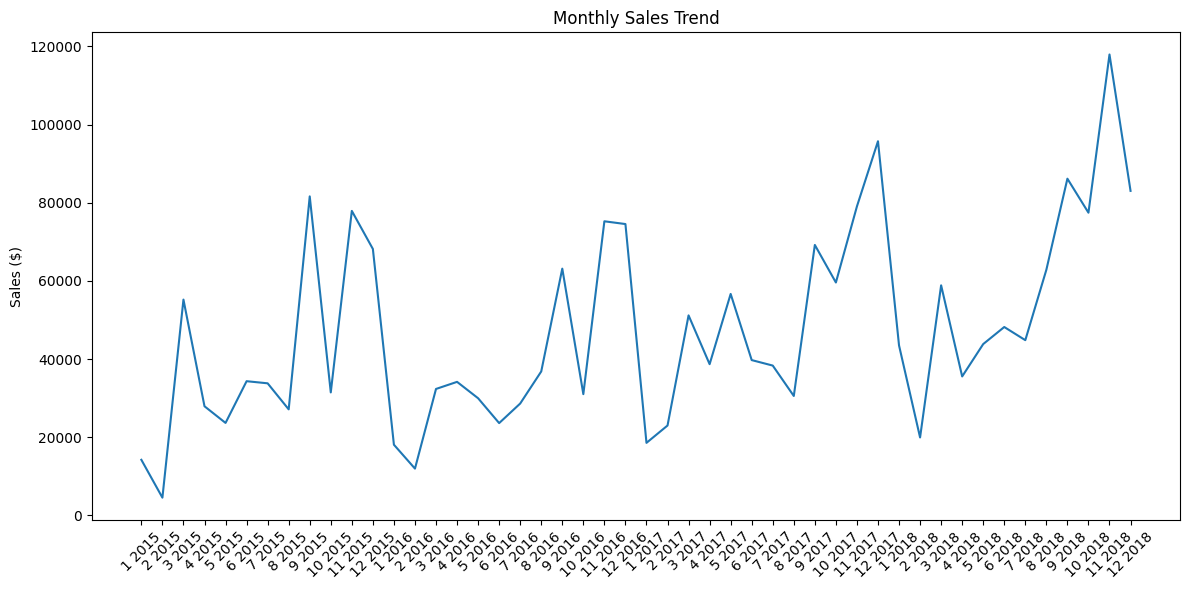

In [8]:
# Monthly sales trend
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Month'].astype(str) + ' ' + monthly_sales['Year'].astype(str), monthly_sales['Sales'])
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.ylabel('Sales ($)')
plt.tight_layout()
plt.show()


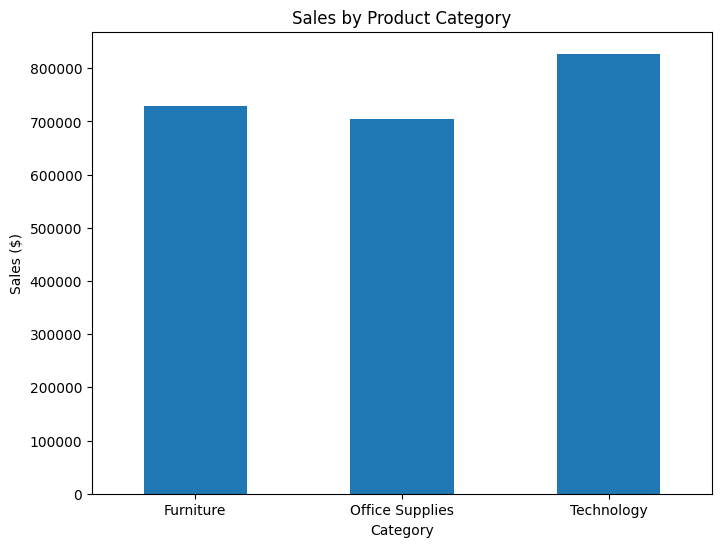

In [9]:
# Sales by category
category_sales = df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(8,6))
category_sales.plot(kind='bar')
plt.title('Sales by Product Category')
plt.ylabel('Sales ($)')
plt.xticks(rotation=0)
plt.show()


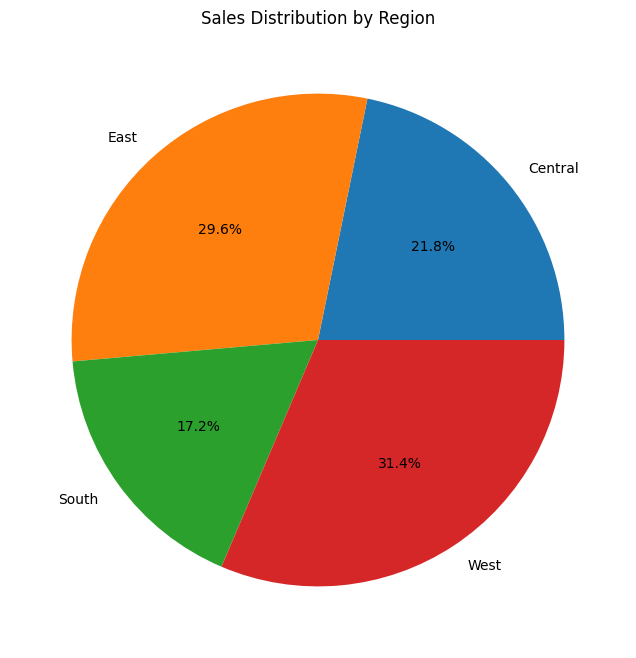

In [10]:

# Regional sales distribution
region_sales = df.groupby('Region')['Sales'].sum()
plt.figure(figsize=(8,8))
region_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.show()


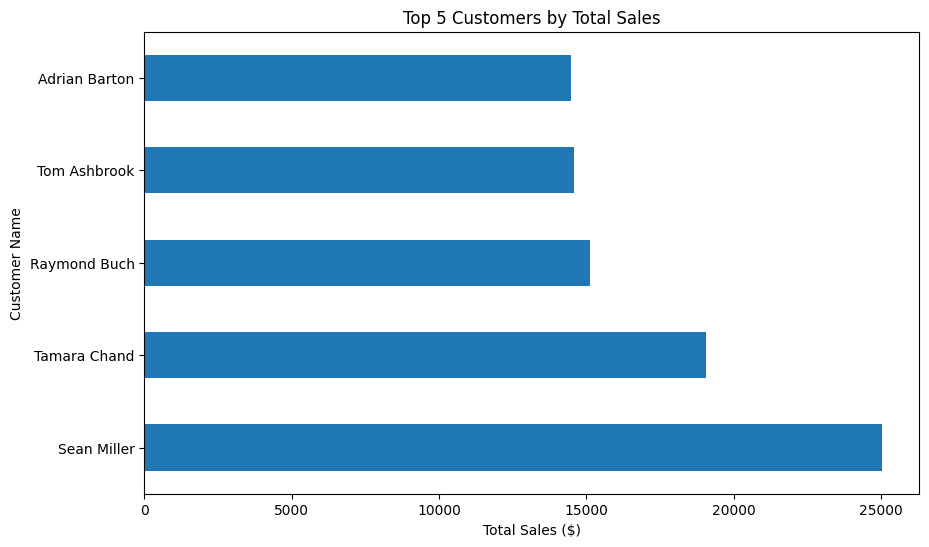

In [11]:
# Top customers
top_customers = df.groupby('Customer Name')['Sales'].sum().nlargest(5)
plt.figure(figsize=(10,6))
top_customers.plot(kind='barh')
plt.title('Top 5 Customers by Total Sales')
plt.xlabel('Total Sales ($)')
plt.show()


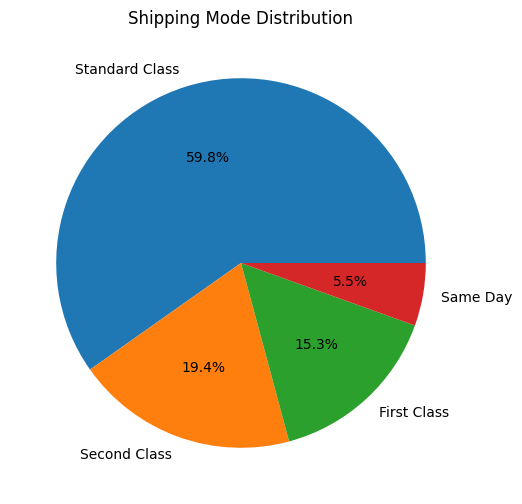

In [12]:
# Shipping mode analysis
ship_mode = df['Ship Mode'].value_counts()
plt.figure(figsize=(8,6))
ship_mode.plot(kind='pie', autopct='%1.1f%%')
plt.title('Shipping Mode Distribution')
plt.ylabel('')
plt.show()